In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
register_matplotlib_converters()
df = pd.read_csv("fcc-forum-pageviews.csv",index_col=["date"],parse_dates=["date"],)


In [2]:
#Clean the data by filtering out days when the page views were in 
# the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df["value"] >= df["value"].quantile(0.025)) &(df["value"] <= df["value"].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [3]:
##regular method
# def draw_line_plot():
    
    
#     plt.figure(figsize=(16,6))
#     plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
#     plt.xlabel("Date")
#     plt.ylabel('Page Views')
    
#     fig=plt.plot(df.index,df['value'],color='red')
#     fig=plt.savefig('line_plot.png')
#     return fig




In [4]:
#draw_line_plot()

In [26]:
from matplotlib.pyplot import title
"""OOP method"""
def draw_line_plot():
    fig,ax=plt.subplots(figsize=(16, 6))
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_xlabel('Page Views')
    ax.plot(df.index,df['value'],color='red',)
    fig.savefig('line_plot.png')
    return fig


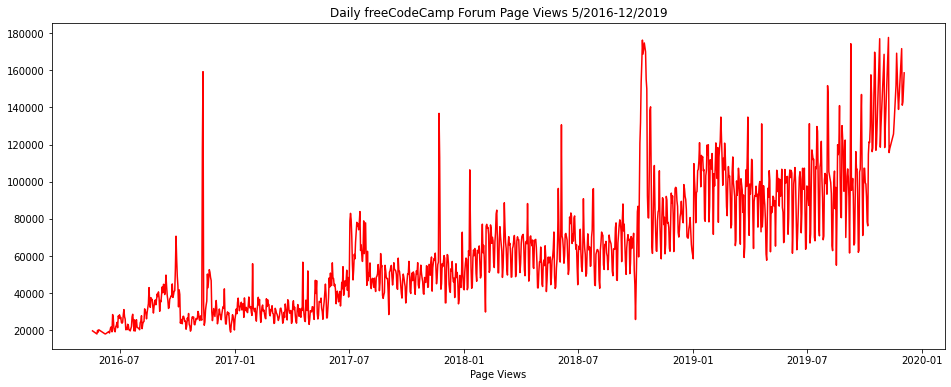

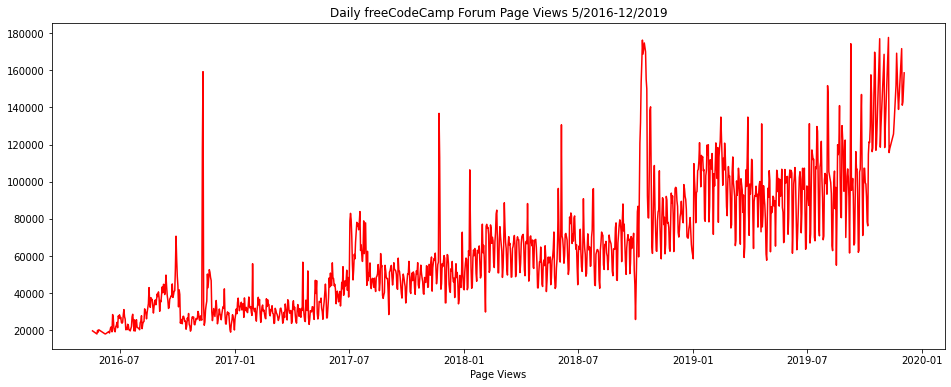

In [27]:
draw_line_plot()

In [ ]:
df_bar=df.copy()
df_bar['year']=df_bar.index.year
df_bar['month']=df_bar.index.month



df_bar = df_bar.groupby(["year", "month"])["value"].mean()

In [ ]:
# df_bar.rename(columns={'value':'count','year':'Years','month':'Months'},inplace=True)
# df_bar=pd.melt(df_bar,id_vars=['Years','Months'])
# df_bar.rename(columns={'value':'Average Page Views'},inplace=True)




df_bar=df_bar.unstack(level=-1)

df_bar


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [ ]:

# gkk = df_bar[df_bar.groupby(['Years', 'Months'])]
# gkk
# df_bar['Months']=pd.to_datetime(df_bar['Months'], format='-%m-').dt.month_name()
# df_bar

<class 'matplotlib.figure.Figure'>


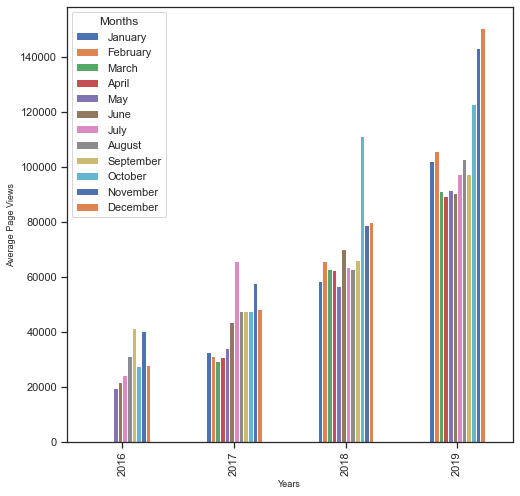

In [ ]:
from matplotlib.pyplot import title


fig = df_bar.plot(kind ="bar", legend = True, figsize = (8, 8)).figure
plt.xlabel("Years", fontsize= 9)
plt.ylabel("Average Page Views", fontsize= 9)
plt.legend(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],title='Months')
sns.set_theme(style="ticks")
fig=fig
fig.savefig('bar_plot.png')
print(type(fig))

In [28]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]


In [29]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


<AxesSubplot:xlabel='year', ylabel='value'>

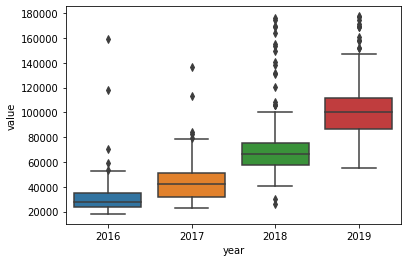

In [30]:
sns.boxplot(data=df_box,x='year',y='value')

In [35]:
def draw_box_plot():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["value"])
    ax1.set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(ax=ax2,data=df_box,x=df_box["month"],y=df_box["value"],order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",])
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    return fig


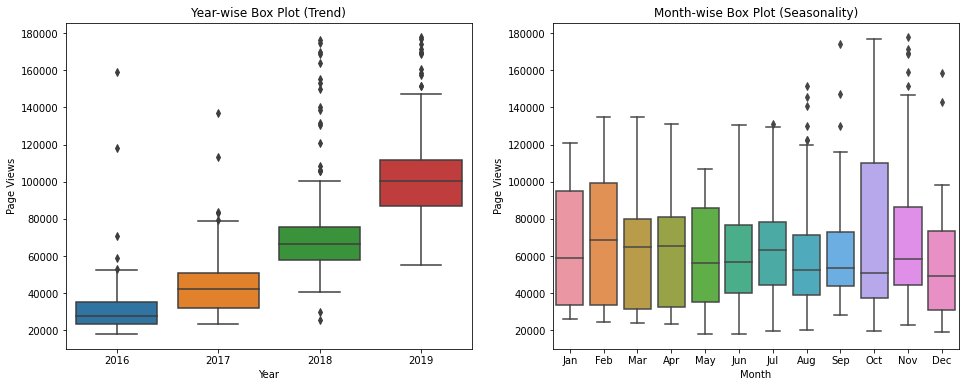

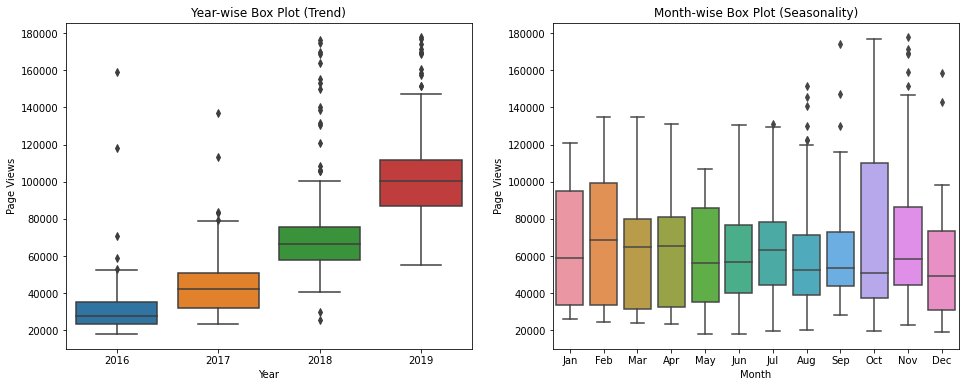

In [36]:
draw_box_plot()